# About the Project

## Case Study 1.1.1: Genetic Codes
Instructor: Tamara Broderick
Activity Type: Optional 
Case Study Description: Using K-means to help figure out that DNA is composed of 3-letter words.
Self-Help Documentation: From this document, you will learn how data visualization can help in genomic sequence analysis and start with a fragment of genetic text of a bacterial genome and analyze its structure.
Download Self-Help Documentation

Time Required: The time required to do this activity varies depending on your experience in the required programming background. We suggest planning somewhere between 1 & 3 hours. Remember, this is an optional activity for participants looking for hands-on experience.
Have questions? Feel free to discuss the case study with other participants in the Discussion Forum under Module 1 - Case Studies Section.

## Pre-Processing

In [1]:
# Importing libraries
import re
import matplotlib.pyplot as plt
from itertools import product
import numpy as np
import pandas as pd
from pandas import *

# Pretty display for notebooks
%matplotlib inline

In [2]:
txt = ""
with open("gene.txt", 'r') as reader:
    for line in reader:
        txt = txt + line.rstrip()

reader.close()

In [3]:
permutationHeaders = [''.join(p) for p in product('acgt', repeat=3)] 
data = pd.DataFrame(columns = permutationHeaders)

In [4]:
n  = 300
n_codons = 3
splitted_codons = []
txtCodons = ""
line = ""
countLine = 0
for index in range(0, len(txt), n):
    line = txt[index : index + n]
    
    txtCodons =  (re.sub("(.{3})", "\\1 ",line).split())

    #splitted_codons.append(txtCodons)

    wordfreq = []
    for token in permutationHeaders:
        wordfreq.append(txtCodons.count(token))
    data.loc[countLine] = wordfreq
    
    countLine +=1


## Exploring and Visualising Data

In [5]:
# Display a description of the dataset
display(data.describe())

,aaa,aac,aag,aat,aca,acc,acg,act,aga,agc,...,tcg,tct,tga,tgc,tgg,tgt,tta,ttc,ttg,ttt
count,1018,1018,1018,1018,1018,1018,1018,1018,1018,1018,...,1018,1018,1018,1018,1018,1018,1018,1018,1018,1018
unique,6,8,12,5,10,12,12,8,10,11,...,15,9,9,11,14,7,4,13,12,6
top,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
freq,738,551,455,782,600,357,318,684,508,264,...,219,482,432,379,251,575,891,413,578,702


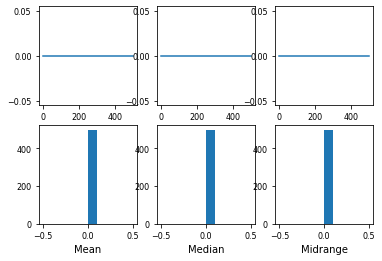

In [6]:
plotting.bootstrap_plot(data.all());

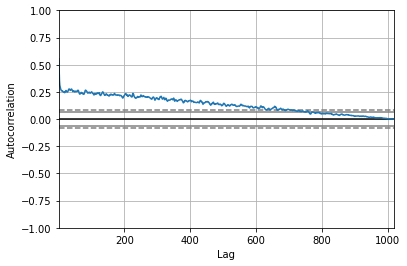

In [7]:
plotting.autocorrelation_plot(data);

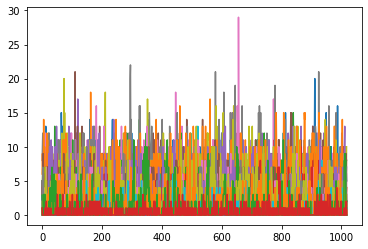

In [8]:
plt.plot(data);

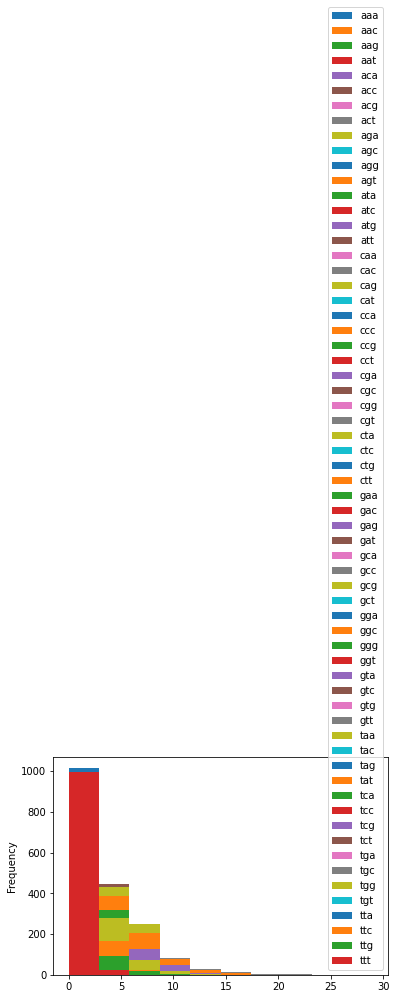

In [9]:
data.plot.hist(legend='center left');

## Applying Clustering and PCA

In [10]:
from sklearn.preprocessing import StandardScaler
data_scaled = StandardScaler().fit_transform(data)

In [11]:
from sklearn.decomposition import PCA

# Transform the scaled data using the PCA fit above
pca = PCA(n_components=2 ,random_state=2).fit(data_scaled)

reduced_data = pca.transform(data_scaled)

pca_samples = pd.DataFrame(data = reduced_data, columns = ['pca 1', 'pca 2'])



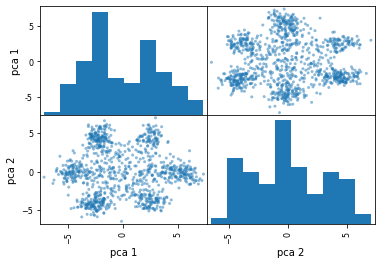

In [16]:
plotting.scatter_matrix(pca_samples);

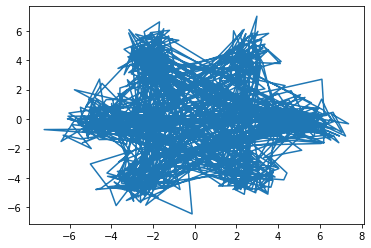

In [13]:
plt.plot(pca_samples['pca 1'], pca_samples['pca 2'])

## Conclusion

K-means score:  0.5426067388886062


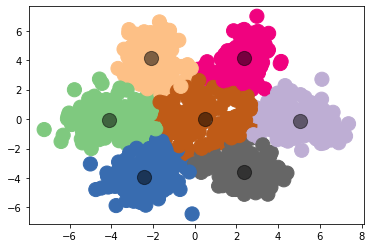

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters = 7 

clusterer = KMeans(n_clusters = n_clusters, random_state=42).fit(pca_samples)
#Predict the cluster for each data point
preds = clusterer.predict(pca_samples)

#Find the cluster centers
centers = clusterer.cluster_centers_

#Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(pca_samples, clusterer.labels_, metric='euclidean')
print ("K-means score: ", score)


plt.scatter(pca_samples['pca 1'], pca_samples['pca 2'], c = sample_preds, s = 200, cmap = 'Accent')


plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);